### Домашнее задание
#### 1.Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
a.Построить точечный график

b.Рассчитать коэффициенты корреляции Пирсона и Спирмена

c.Построить модель линейной регрессии

d.Рассчитать коэффициент детерминации

e.Вывести график остатков
#### 2.Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
a.Разделить данные на 2 группы

b.Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('water.csv')
df.head()


,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


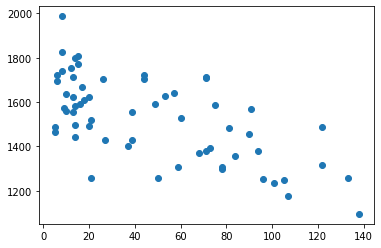

In [4]:
plt.scatter(df['hardness'], df['mortality'])

In [5]:
df[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
df[['hardness','mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [7]:
df[['hardness','mortality']].corr(method = 'kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [8]:
from sklearn.linear_model import LinearRegression

In [32]:
X = df[['hardness']].values
Y = df['mortality'].values

In [33]:
X.shape

(61, 1)

In [34]:
Y.shape

(61,)

In [39]:
model = LinearRegression()
model.fit(X, Y)
model.score(X, Y)

0.4288267193124974

In [40]:
model.coef_

array([-3.22609161])

In [41]:
model.intercept_

1676.3556007011584

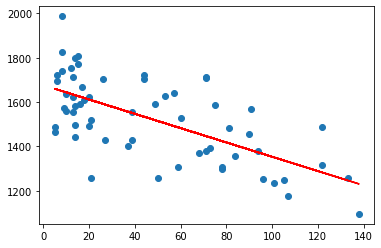

In [42]:
plt.scatter(df['hardness'], df['mortality'])
plt.plot(df['hardness'], model.predict(df[['hardness']]), c='r')

In [44]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


In [45]:
X = sm.add_constant(X)

In [46]:
X.shape

(61, 2)

In [47]:
X[:5]

array([[  1., 105.],
       [  1.,  17.],
       [  1.,   5.],
       [  1.,  14.],
       [  1.,  18.]])

In [48]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.03e-08
Time:                        16:47:51   Log-Likelihood:                -388.28
No. Observations:                  61   AIC:                             780.6
Df Residuals:                      59   BIC:                             784.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1676.3556     29.298     57.217      0.0

In [49]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [1676.3556007    -3.22609161]
R2:  0.42882671931249716


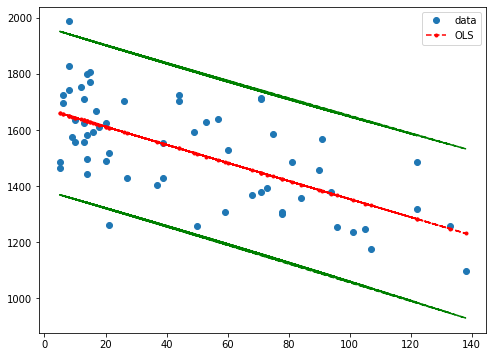

In [50]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X[:,1], Y, 'o', label="data")
ax.plot(X[:,1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X[:,1], iv_u, 'g--')
ax.plot(X[:,1], iv_l, 'g--')
ax.legend(loc='best');

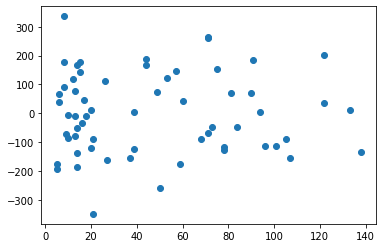

In [51]:
plt.scatter(X[:, 1], results.resid)

(array([ 1.,  1.,  7., 13.,  9.,  8.,  9.,  9.,  3.,  1.]),
 array([-348.60767697, -280.10159606, -211.59551515, -143.08943423,
         -74.58335332,   -6.07727241,   62.4288085 ,  130.93488941,
         199.44097033,  267.94705124,  336.45313215]),
 <a list of 10 Patch objects>)

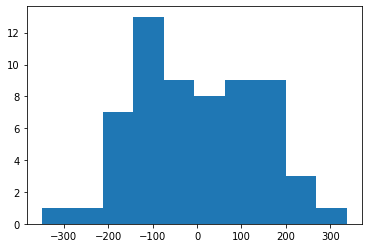

In [52]:
plt.hist(results.resid)

In [57]:
df_south = df[df['location'] == 'South']
df_north = df[df['location'] == 'North']

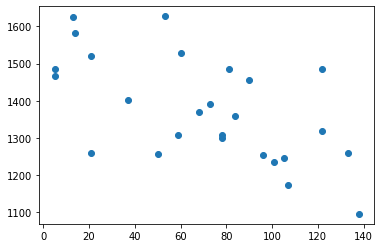

In [69]:
plt.scatter(df_south['hardness'], df_south['mortality']) 


In [79]:
df_south[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [80]:
df_south[['hardness','mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [84]:
df_south[['hardness','mortality']].corr(method = 'kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [97]:
X_s = df_south[['hardness']].values
Y_s = df_south['mortality'].values

In [98]:
model_s = LinearRegression()
model_s.fit(X_s, Y_s)
model_s.score(X_s, Y_s)

0.3625885624364601

In [101]:
model_s.coef_

array([-2.09271845])

In [103]:
model_s.intercept_

1522.8150485436895

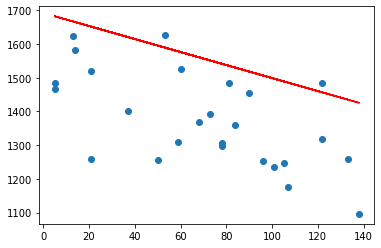

In [105]:
plt.scatter(df_south['hardness'], df_south['mortality'])
plt.plot(df_south['hardness'], model.predict(df_south[['hardness']]), c='r')

In [108]:
X_s = sm.add_constant(X_s)

In [124]:
model_s = sm.OLS(Y_s, X_s)
results_s = model_s.fit()
#print(results_s.summary())

In [113]:
print('Parameters: ', results_s.params)
print('R2: ', results_s.rsquared)

Parameters:  [1522.81504854   -2.09271845]
R2:  0.3625885624364602


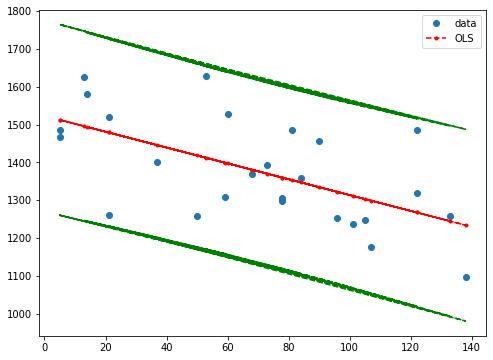

In [146]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_s[:,1], Y_s, 'o', label="data")
ax.plot(X_s[:,1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_s[:,1], iv_u, 'g--')
ax.plot(X_s[:,1], iv_l, 'g--')
ax.legend(loc='best');

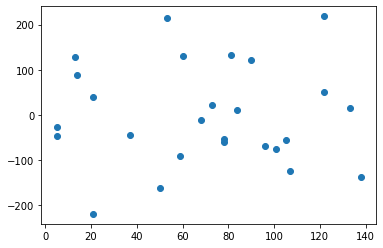

In [150]:
plt.scatter(X_s[:, 1], results_s.resid)

(array([1., 2., 2., 6., 3., 4., 1., 4., 1., 2.]),
 array([-2.18867961e+02, -1.75131505e+02, -1.31395049e+02, -8.76585922e+01,
        -4.39221359e+01, -1.85679612e-01,  4.35507767e+01,  8.72872330e+01,
         1.31023689e+02,  1.74760146e+02,  2.18496602e+02]),
 <a list of 10 Patch objects>)

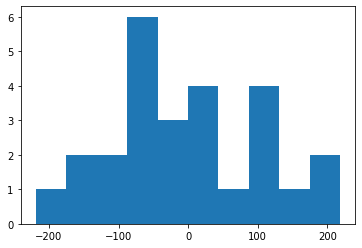

In [151]:
plt.hist(results_s.resid)

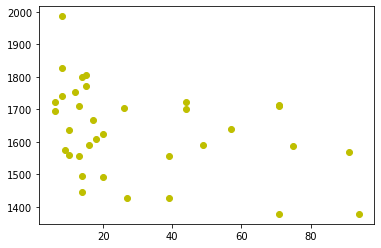

In [126]:
plt.scatter(df_north['hardness'], df_north['mortality'], c = 'y')

In [127]:
df_north[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [128]:
df_north[['hardness','mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [129]:
df_north[['hardness','mortality']].corr(method = 'kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


In [130]:
X_n = df_north[['hardness']].values
Y_n = df_north['mortality'].values

In [131]:
model_n = LinearRegression()
model_n.fit(X_n, Y_n)
model_n.score(X_n, Y_n)

0.1358643664207173

In [132]:
model_n.coef_

array([-1.93134215])

In [133]:
model_n.intercept_

1692.312801433099

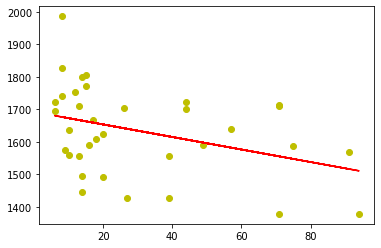

In [134]:
plt.scatter(df_north['hardness'], df_north['mortality'], c = 'y')
plt.plot(df_north['hardness'], model.predict(df_north[['hardness']]), c='r')

In [137]:
X_n = sm.add_constant(X_n)

In [138]:
model_n = sm.OLS(Y_n, X_n)
results_n = model_n.fit()
#print(results_n.summary())

In [139]:
print('Parameters: ', results_n.params)
print('R2: ', results_n.rsquared)

Parameters:  [1692.31280143   -1.93134215]
R2:  0.13586436642071753


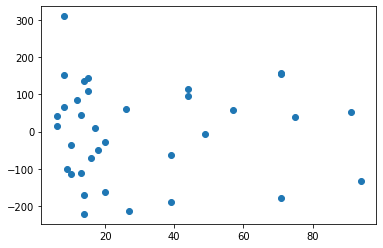

In [152]:
plt.scatter(X_n[:, 1], results_n.resid)

(array([5., 3., 4., 3., 6., 6., 4., 3., 0., 1.]),
 array([-221.2740113 , -168.13281659, -114.99162188,  -61.85042717,
          -8.70923247,   44.43196224,   97.57315695,  150.71435166,
         203.85554637,  256.99674108,  310.13793579]),
 <a list of 10 Patch objects>)

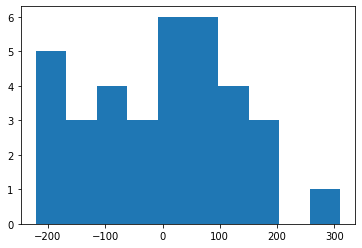

In [153]:
plt.hist(results_n.resid)